In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Pre-processing
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Handling missing data/Nan inputs in df w/ function to fill w/ mean?

In [5]:
def fill_nan(df_clean):
    for index, column in enumerate(df_clean.columns[:9]):
        # print(index, column)
        df_clean[column] = df_clean[column].fillna(df_clean.groupby('Potability')[column].transform('median'))
    return df_clean
        
df_clean = fill_nan(df) 
df_clean.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074069,196.369496,22014.092526,7.122277,333.544928,426.205111,14.284970,66.405792,3.966786,0.390110
std,1.470043,32.879761,8768.570828,1.583085,36.146829,80.824064,3.308162,15.769943,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.035456,196.967627,20927.833607,7.130299,333.389426,421.884968,14.218338,66.542198,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df_clean.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
df_clean.head()
df_clean.shape

(3276, 10)

Scale dataset 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [9]:
scaler = MinMaxScaler()
array = scaler.fit_transform(df_clean.to_numpy())
df_scaled = pd.DataFrame(array, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                            'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
df_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505291,0.540231,0.356173,0.529963,0.581043,0.427940,0.463026,0.532750,0.475853,0.390110
std,0.105003,0.119263,0.143968,0.123921,0.102681,0.141336,0.126750,0.127938,0.147548,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198,0.000000
50%,0.502533,0.542401,0.338338,0.530591,0.580601,0.420386,0.460473,0.533856,0.473630,0.000000
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Preparing variables
X = df_scaled.drop(['Potability'], axis = 1)
y = df_scaled['Potability']

Principle Component Analysis set up

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:
pca = PCA(n_components=0.90)

water_pca = pca.fit_transform(X)

In [13]:
# df of reduced dataset
pca_df = pd.DataFrame(
        data=water_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.142775,0.126503,0.221149,-0.215731,-0.080278,0.055509,0.005216,0.004534
1,0.134028,-0.021173,0.293652,0.018269,-0.052523,-0.159963,-0.210472,-0.209002
2,-0.191108,0.056813,-0.002884,0.026806,0.062038,-0.084668,0.175792,0.048447
3,0.025418,-0.106019,-0.081236,-0.138901,0.307667,0.017549,0.075607,0.080671
4,-0.006709,-0.073215,-0.032619,0.196988,-0.213490,0.007901,-0.044012,0.137568


In [14]:
# Concat with target variable for complete data set
pca_df = pd.concat([pca_df, pd.DataFrame(y)] , axis = 1)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Potability
0,-0.142775,0.126503,0.221149,-0.215731,-0.080278,0.055509,0.005216,0.004534,0.0
1,0.134028,-0.021173,0.293652,0.018269,-0.052523,-0.159963,-0.210472,-0.209002,0.0
2,-0.191108,0.056813,-0.002884,0.026806,0.062038,-0.084668,0.175792,0.048447,0.0
3,0.025418,-0.106019,-0.081236,-0.138901,0.307667,0.017549,0.075607,0.080671,0.0
4,-0.006709,-0.073215,-0.032619,0.196988,-0.213490,0.007901,-0.044012,0.137568,0.0


In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PC1', ylabel='PC5'>

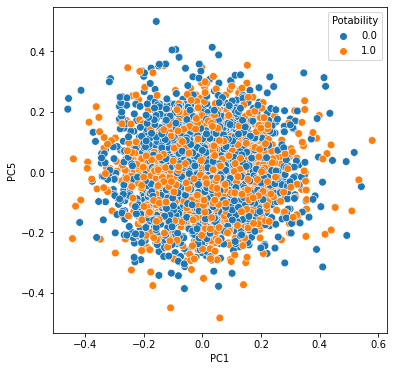

In [16]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = pca_df , x = 'PC1',y = 'PC5' , hue = 'Potability' , s = 60)

In [17]:
# Train Test and Split, stratify for unbalanced data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1111, stratify=y) 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score, classification_report

In [19]:
k = range(1,20,1)
testing_accuracy = []
training_accuracy = []

score = 0

# knn
for i in k:
    knn= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    knn.fit(X_train, y_train)  
    y_pred_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score for PCA from KNN Model', score, 'Best K-Score', best_k)

Best Accuracy Score for PCA from KNN Model 0.6449643947100712 Best K-Score 6


In [20]:
from sklearn.svm import SVC

In [21]:
svm = SVC(kernel='rbf')

svm = svm.fit(X_train, y_train)

y_pred=svm.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('Best Accuracy Score for SVM', acc, 'model is able to succesfully predict on waterpotability with a value of ', acc)

Best Accuracy Score for SVM 0.6795523906408952 model is able to succesfully predict on waterpotability with a value of  0.6795523906408952


In [22]:
from sklearn.ensemble import RandomForestClassifier

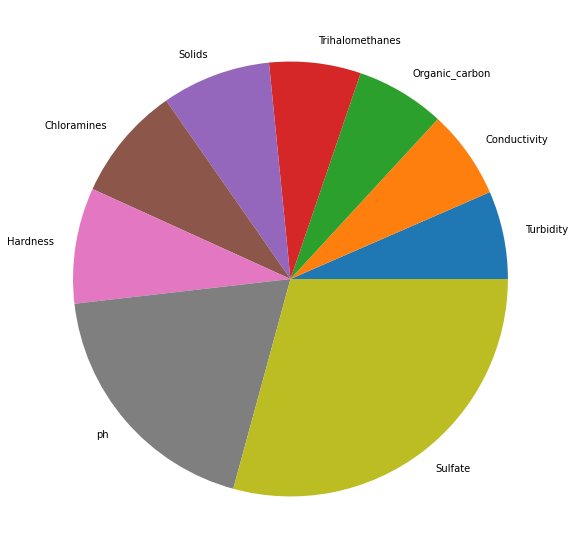

In [23]:
clasification = RandomForestClassifier()
clasification.fit(X,y)

variables = X.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels)
plt.show()

In [24]:
# Pie chart above reveals variables all have a similar degree of importance
#  and is the justification for not deleting any PCs


In [37]:
clf = RandomForestClassifier(random_state=1, n_estimators=6, bootstrap=True, max_samples=1500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9385085041430441
Testing Score: 0.7558494404883012


overtrained model, used bootstrap and max_samples to draw the number of samples from X to train each base estimator

[0.18343175 0.07517112 0.09724666 0.08156173 0.25517865 0.06544781
 0.08150602 0.08272391 0.07773235]


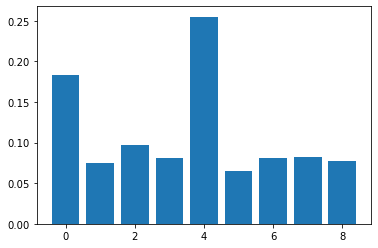

In [26]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074069,196.369496,22014.092526,7.122277,333.544928,426.205111,14.284970,66.405792,3.966786,0.390110
std,1.470043,32.879761,8768.570828,1.583085,36.146829,80.824064,3.308162,15.769943,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.035456,196.967627,20927.833607,7.130299,333.389426,421.884968,14.218338,66.542198,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [29]:
# Linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.006038030137137662
Testing Score: -0.007121209643565107


In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [32]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [33]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6105538595726123
Testing Data Score: 0.6113936927772126


In [1]:
s='1 w 2 r 3g'
print(s.title())

1 W 2 R 3G
